#### Maria Barrera -- SQL Alchemy Challenge -- 02/2/2021

climate_mainPy - Climate analysis and data exploration of a climate database.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

### Setup

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
engine

Engine(sqlite:///Resources/hawaii.sqlite)

### Explore Database

In [5]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [6]:
# Geta list of columns names and types for table: measurement
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])
#columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [7]:
# Geta list of columns names and types for table: station
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c['type'])
#columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
session = Session(engine)
session

In [9]:
conn = engine.connect()
conn

In [10]:
# reflect an existing database into a new model
station_data = engine.execute("SELECT * FROM station")

# reflect the tables
for record in station_data:
    print(record)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [11]:
measurement_data = engine.execute("SELECT * FROM measurement limit 10")

# reflect the tables
for record in measurement_data:
    print(record)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)


In [12]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Measurement    

sqlalchemy.ext.automap.measurement

In [14]:
Station = Base.classes.station
Station

sqlalchemy.ext.automap.station

In [15]:
# Create our session (link) from Python to the DB
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [16]:
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

#Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the most recent data point in the database. 

#Calculate the date one year from the last date in data set.

#Perform a query to retrieve the data and precipitation scores

#Save the query results as a Pandas DataFrame and set the index to the date column

#Sort the dataframe by date

#Use Pandas Plotting with Matplotlib to plot the data

In [17]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [18]:
# Earliest Date
earliest_date = session.query(Measurement.date).order_by(Measurement.date).first()
earliest_date

('2010-01-01')

In [19]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [20]:
# date one year from the last date in data set --> 2017-08-23 -- using date function
year_ago = dt.date(2017, 8 ,23) - dt.timedelta(days=365)
print("Year ago date: ", year_ago)

Year ago date:  2016-08-23


In [21]:
# Find the most recent date in the data set. -- opt 2 using sql
most_recent_date = measurement_df["date"].max()
print("Most recent date: ", most_recent_date)

Most recent date:  2017-08-23


In [22]:
# opt2 - using SQL
stmt = " \
    SELECT MAX(date) \
    FROM measurement;"

sqlrecentdate = pd.read_sql(stmt, conn)
print(sqlrecentdate)

    MAX(date)
0  2017-08-23


In [23]:
#Perform a query to retrieve the data and precipitation scores
#Save the query results as a Pandas DataFrame and set the index to the date column

statement = " \
    SELECT date, prcp \
    FROM measurement \
    WHERE (date BETWEEN '2016-08-23' AND '2017-08-23') \
        AND (prcp <> 0) \
    ORDER BY date DESC;"

prcp_12mo_df = pd.read_sql(statement, conn)
prcp_12mo_df.set_index('date', inplace=True)
prcp_12mo_df

,prcp
date,
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.02
2017-08-21,0.56
...,...
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02


In [24]:
#Sort the dataframe by date
prcp_sortedbydate_df = prcp_12mo_df.sort_values('date', ascending=True)
prcp_sortedbydate_df

,prcp
date,
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
2016-08-23,0.05
...,...
2017-08-21,0.56
2017-08-21,0.02
2017-08-22,0.50


In [25]:
new_df = prcp_sortedbydate_df.groupby('date').agg({'prcp': 'mean'})
new_df

,prcp
date,
2016-08-23,0.542000
2016-08-24,1.555000
2016-08-25,0.108000
2016-08-26,0.025000
2016-08-27,0.106667
...,...
2017-08-19,0.090000
2017-08-20,0.010000
2017-08-21,0.290000


In [26]:
#new_df.dropna(how="any")
#new_df

In [27]:
new_df = new_df.reset_index()

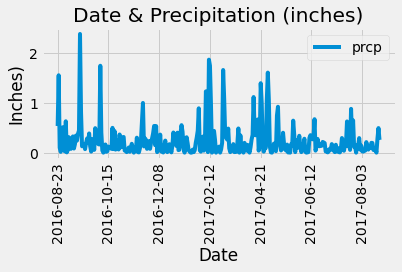

In [28]:
# Creating bar plot using PANDAS.

new_df.plot(x='date', y='prcp', rot = 90)

# Set a Title and labels
plt.title("Date & Precipitation (inches)")
plt.xlabel("Date")
plt.ylabel("Inches)")

# Save graph and show the graph
plt.savefig("Images/Date_vs_Precipitation_plot.png")

plt.tight_layout()
plt.show()

In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_12mo_df[["prcp"]].describe()

,prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


# Exploratory Station Analysis

In [30]:
# Design a query to calculate the total number stations in the dataset

statement = "SELECT COUNT(station) \
            FROM station;" \
            
# for testing only
#print(statement)
#print(type(statement))

total_num_stations_df = pd.read_sql(statement, conn)
total_num_stations_df


,COUNT(station)
0,9


In [31]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

statement1 = " \
    SELECT s.station, COUNT(date) \
    FROM station s \
    INNER JOIN measurement m \
    ON s.station = m.station \
    GROUP BY s.station \
    ORDER BY COUNT(date) DESC;"

station_count_df = pd.read_sql(statement1, conn)
station_count_df

,station,COUNT(date)
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Note:  most_recent_date = 2017-08-23

statement2 = " \
    SELECT date, tobs \
    FROM measurement \
    WHERE (station = 'USC00519281' \
    AND date BETWEEN '2016-08-24' AND '2017-08-23') \
    ORDER BY date DESC;"

active_station_df = pd.read_sql(statement2, conn)
active_station_df

,date,tobs
0,2017-08-18,79.0
1,2017-08-17,76.0
2,2017-08-16,76.0
3,2017-08-15,77.0
4,2017-08-14,77.0
...,...,...
346,2016-08-28,73.0
347,2016-08-27,75.0
348,2016-08-26,80.0
349,2016-08-25,80.0


<function matplotlib.pyplot.close(fig=None)>

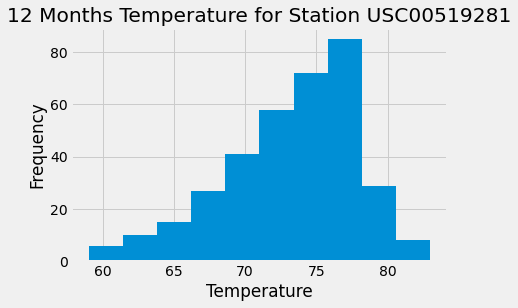

In [33]:
# Create a histogram to visualize the the last 12 months of temperature observation data for this station
import matplotlib.pyplot as plt
import numpy as np

active_station_df.hist(column='tobs')

# Set a Title and labels
plt.title("12 Months Temperature for Station USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Save the graph and show the graph
plt.savefig("Images/histogram_12_mo_temp.png")

plt.legend
plt.close

# Close session

In [34]:
# Close Session
session.close()